In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('diamonds.csv')

# Analyse Exploratoire des Données 

In [3]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
data.shape

(53940, 10)

In [5]:
df = data.copy()

In [6]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
df.dtypes.value_counts()

float64    6
object     3
int64      1
Name: count, dtype: int64

In [8]:
df.isna()

carat    cut  color  clarity  depth  table  price      x      y      z
0      False  False  False    False  False  False  False  False  False  False
1      False  False  False    False  False  False  False  False  False  False
2      False  False  False    False  False  False  False  False  False  False
3      False  False  False    False  False  False  False  False  False  False
4      False  False  False    False  False  False  False  False  False  False
...      ...    ...    ...      ...    ...    ...    ...    ...    ...    ...
53935  False  False  False    False  False  False  False  False  False  False
53936  False  False  False    False  False  False  False  False  False  False
53937  False  False  False    False  False  False  False  False  False  False
53938  False  False  False    False  False  False  False  False  False  False
53939  False  False  False    False  False  False  False  False  False  False

[53940 rows x 10 columns]

<Axes: >

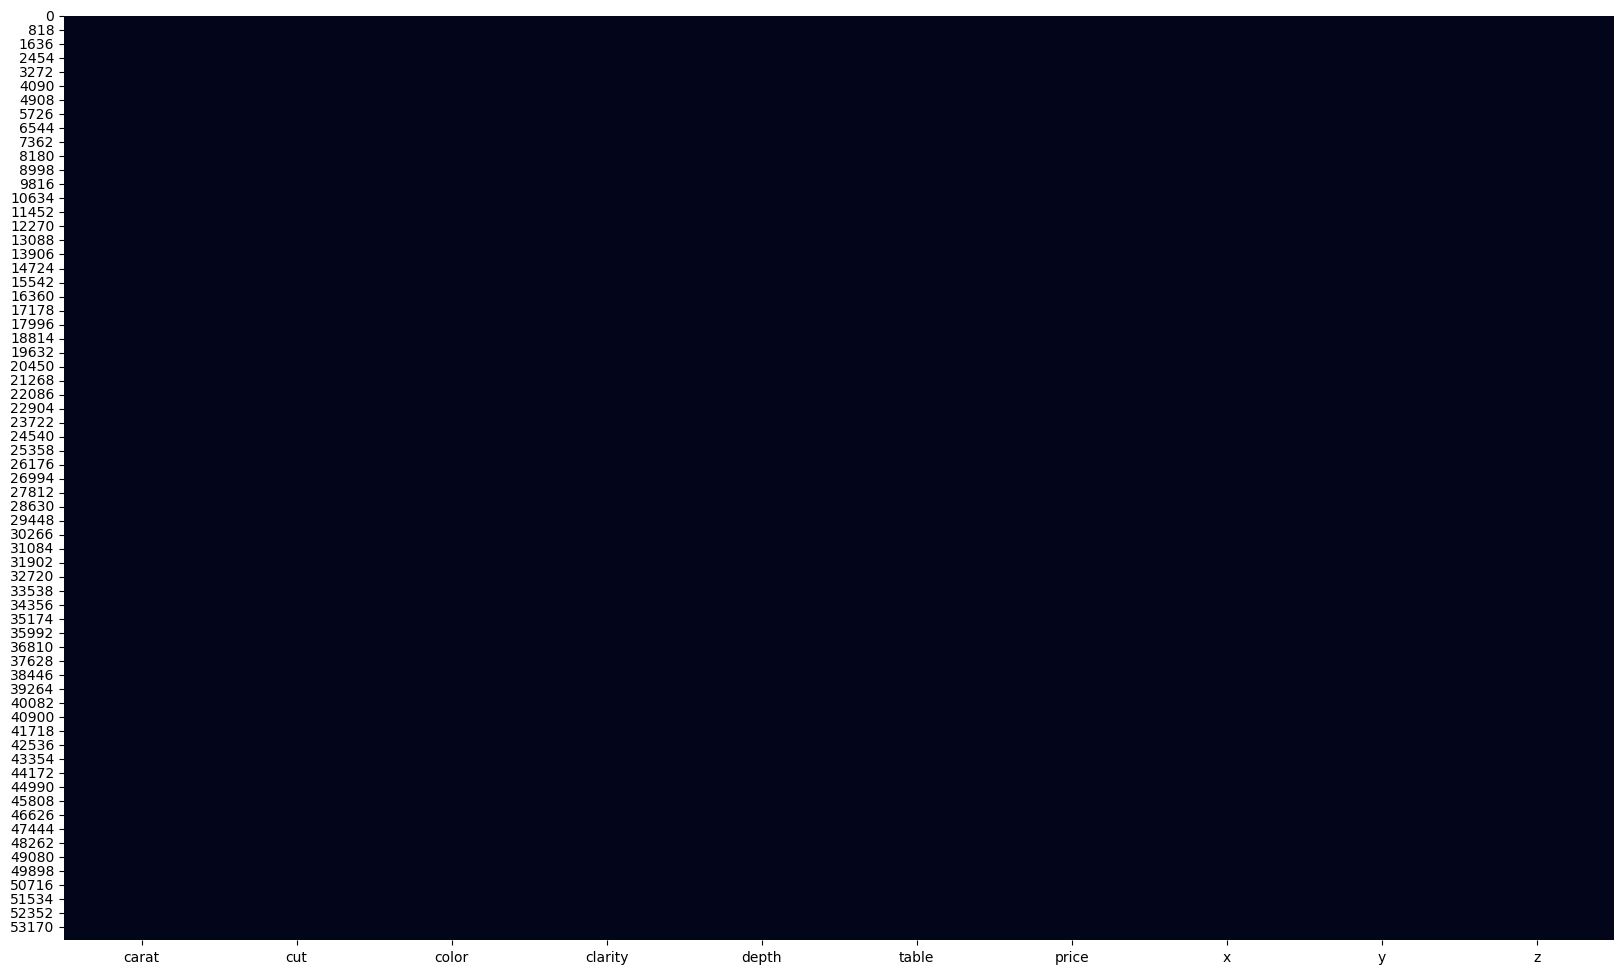

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isna(), cbar=False)

### Examen de la colonne target 

In [10]:
df['price'].value_counts(normalize=True)

price
605      0.002447
802      0.002354
625      0.002336
828      0.002317
776      0.002299
           ...   
8816     0.000019
14704    0.000019
14699    0.000019
14698    0.000019
9793     0.000019
Name: proportion, Length: 11602, dtype: float64

### Histogrames des variables continues

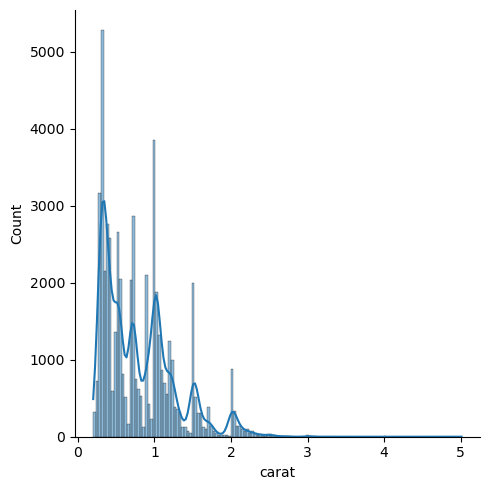

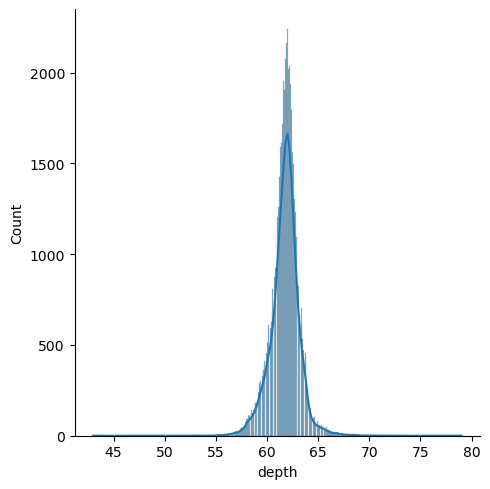

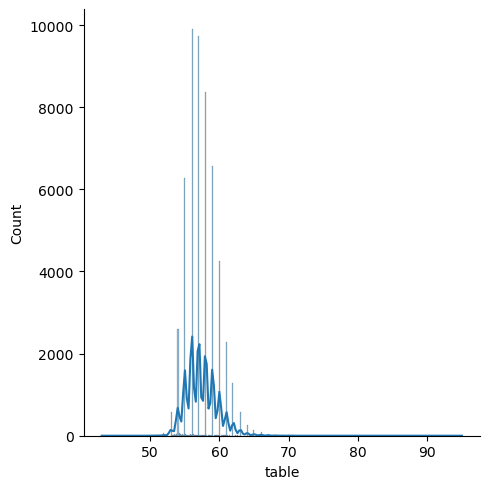

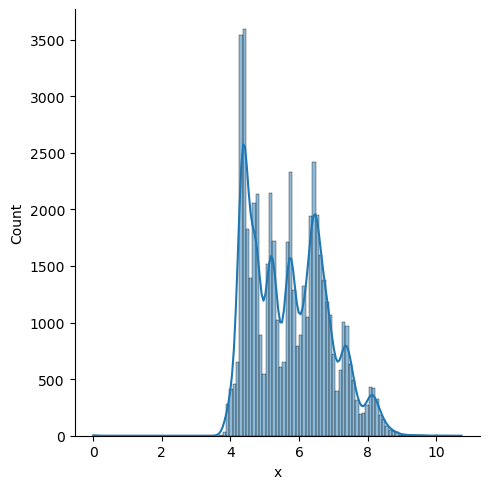

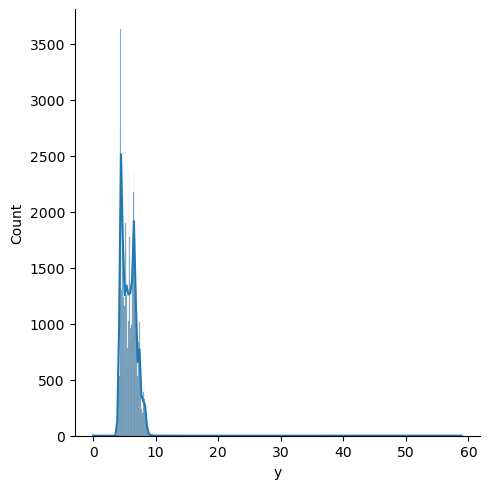

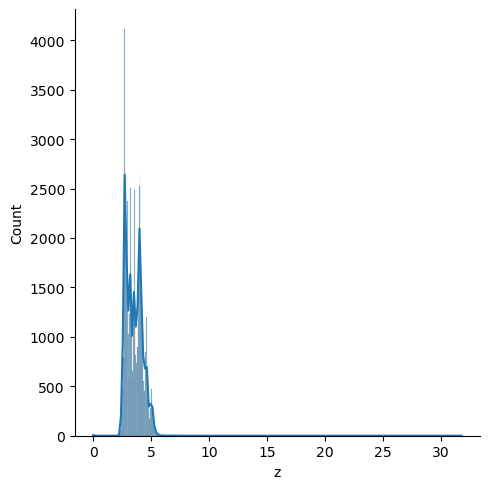

In [11]:
for col in df.select_dtypes('float'):
    sns.displot(df[col],kde=True)

### Variables Qualitatives

In [12]:
for col in df.select_dtypes('object'):
     print(f'{col:-<50} {df[col].unique()}')

cut----------------------------------------------- ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color--------------------------------------------- ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity------------------------------------------- ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


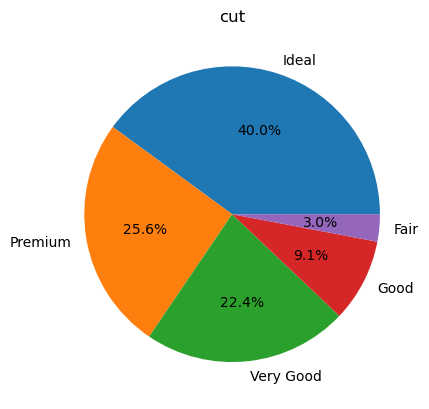

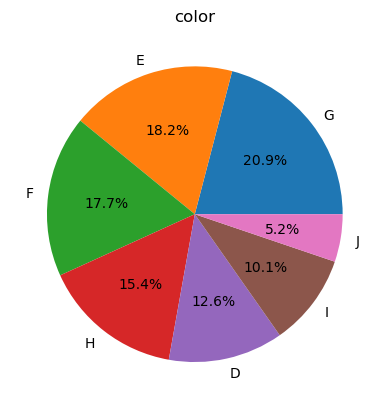

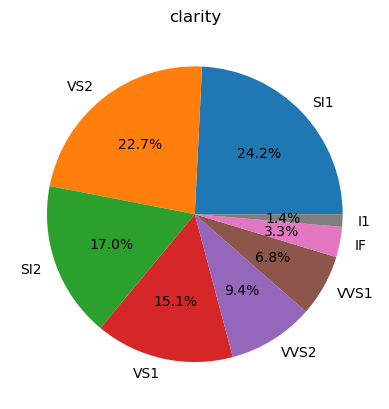

In [13]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel('')  # pour enlever le label "y"

### Relation Target / Variables

In [14]:
pd.crosstab(df['cut'], df['color'])

color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678

In [15]:
pd.crosstab(df['cut'], df['clarity'])

clarity     I1    IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                     
Fair       210     9   408   466   170   261    17    69
Good        96    71  1560  1081   648   978   186   286
Ideal      146  1212  4282  2598  3589  5071  2047  2606
Premium    205   230  3575  2949  1989  3357   616   870
Very Good   84   268  3240  2100  1775  2591   789  1235

In [16]:
pd.set_option('display.max_column', 11602)

In [17]:
pd.crosstab(df['cut'], df['price'])

price      326    327    334    335    336    337    338    339    340    \
cut                                                                        
Fair           0      0      0      0      0      1      0      0      0   
Good           0      1      0      1      0      0      0      1      0   
Ideal          1      0      0      0      0      0      0      0      1   
Premium        1      0      1      0      0      0      0      0      0   
Very Good      0      0      0      0      2      1      1      0      0   

price      342    344    345    348    351    352    353    354    355    \
cut                                                                        
Fair           0      0      0      0      0      0      0      0      0   
Good           0      0      0      0      3      0      0      0      0   
Ideal          0      1      0      1      0      0      0      0      0   
Premium        1      0      2      0      0      0      0      0      1   
Very Good      0      0      0      0      1      1      3      1      0   

price      357    358    360    361    362    363    364    365    366    \
cut                                                                        
Fair           0      0      0      1      0      0      0      0      0   
Good           2      0      0      2      0      1      0      0      0   
Ideal          1      1      1      1      1      1      3      0      1   
Premium        0      0      0      0      0      1      0      1      0   
Very Good      5      0      1      0      3      2      0      0      0   

price      367    368    369    370    371    372    373    374    375    \
cut                                                                        
Fair           0      0      1      0      1      0      0      0      0   
Good           0      2      0      0      0      0      5      3      1   
Ideal          7      0      0      0      2      1      1      0      1   
Premium        7      3      0      0      0      0      0      0      0   
Very Good      3      1      2      1      0      0      5      2      0   

price      376    377    378    379    380    381    382    383    384    \
cut                                                                        
Fair           0      0      0      0      0      0      0      0      0   
Good           1      2      3      0      0      0      0      1      0   
Ideal          0      1      0      2      0      0      3      1      4   
Premium        0      0      1      0      2      0      2      0      0   
Very Good      1      0      4      1      2      1      2      1      2   

price      385    386    388    389    390    391    393    394    395    \
cut                                                                        
Fair           0      0      0      0      0      0      0      0      0   
Good           0      0      0      0      0      1      1     16      1   
Ideal          1      0      0      2      0      4      3      6      2   
Premium        0      6      0      0      1      0      2      9      0   
Very Good      0      1      5      3      0      4      7     17      0   

price      396    397    399    400    401    402    403    404    405    \
cut                                                                        
Fair           0      0      0      0      0      0      0      0      0   
Good           0      0      2      0      1      3      4      0      1   
Ideal          2      3      0      2      4      0      3      2      2   
Premium        0      1      0      1      0      0      1      2      1   
Very Good      0      2      3      1      2     17      2      3      3   

price      406    407    408    409    410    411    412    413    414    \
cut                                                                        
Fair           0      0      0      0      0      0      0      0      0   
Good           0      0      5      1    

In [18]:
pd.crosstab(df['color'], df['price'])

price  326    327    334    335    336    337    338    339    340    342    \
color                                                                         
D          0      0      0      0      0      0      0      0      0      0   
E          2      1      0      0      0      1      0      0      0      0   
F          0      0      0      0      0      0      0      0      0      1   
G          0      0      0      0      0      0      0      0      0      0   
H          0      0      0      0      0      1      1      0      0      0   
I          0      0      1      0      1      0      0      0      0      0   
J          0      0      0      1      1      0      0      1      1      0   

price  344    345    348    351    352    353    354    355    357    358    \
color                                                                         
D          0      0      0      0      0      0      0      0      2      0   
E          0      2      0      0      1      0      0      0      2      0   
F          0      0      0      0      0      0      0      0      2      0   
G          0      0      0      0      0      0      1      0      0      0   
H          0      0      0      0      0      1      0      0      1      0   
I          0      0      1      1      0      0      0      1      0      1   
J          1      0      0      3      0      2      0      0      1      0   

price  360    361    362    363    364    365    366    367    368    369    \
color                                                                         
D          0      1      1      0      0      0      0      4      0      0   
E          0      2      2      0      0      0      0      8      0      0   
F          0      0      0      0      0      0      0      1      0      0   
G          0      1      0      1      3      0      0      0      0      2   
H          1      0      1      0      0      0      0      1      2      1   
I          1      0      0      0      0      0      0      2      0      0   
J          0      0      0      4      0      1      1      1      4      0   

price  370    371    372    373    374    375    376    377    378    379    \
color                                                                         
D          0      0      0      2      0      0      0      0      0      0   
E          0      1      0      3      0      0      0      1      4      0   
F          1      0      0      5      0      0      1      0      0      0   
G          0      0      0      0      0      1      0      1      0      0   
H          0      0      0      0      0      0      1      0      4      0   
I          0      2      1      0      2      0      0      1      0      2   
J          0      0      0      1      3      1      0      0      0      1   

price  380    381    382    383    384    385    386    388    389    390    \
color                                                                         
D          0      0      0      0      0      0      4      3      0      0   
E          0      0      0      0      1      0      3      0      0      0   
F          0      1      0      1      0      0      0      0      0      0   
G          0      0      4      0      1      0      0      1      0      0   
H          0      0      1      1      0      0      0      0      3      1   
I          0      0      2      1      1      1      0      1      1      0   
J          4      0      0      0      3      0      0      0      1      0   

price  391    393    394    395    396    397    399    400    401    402    \
color                                                                         
D          0      0      0      0      0      0      2      0      0      4   
E          1      1      1      0      0      0      0      2      4      6   
F          0      2      9      0      0      0      1      0      2      9   
G          4      0      9      2      0     

<Figure size 2000x1000 with 0 Axes>

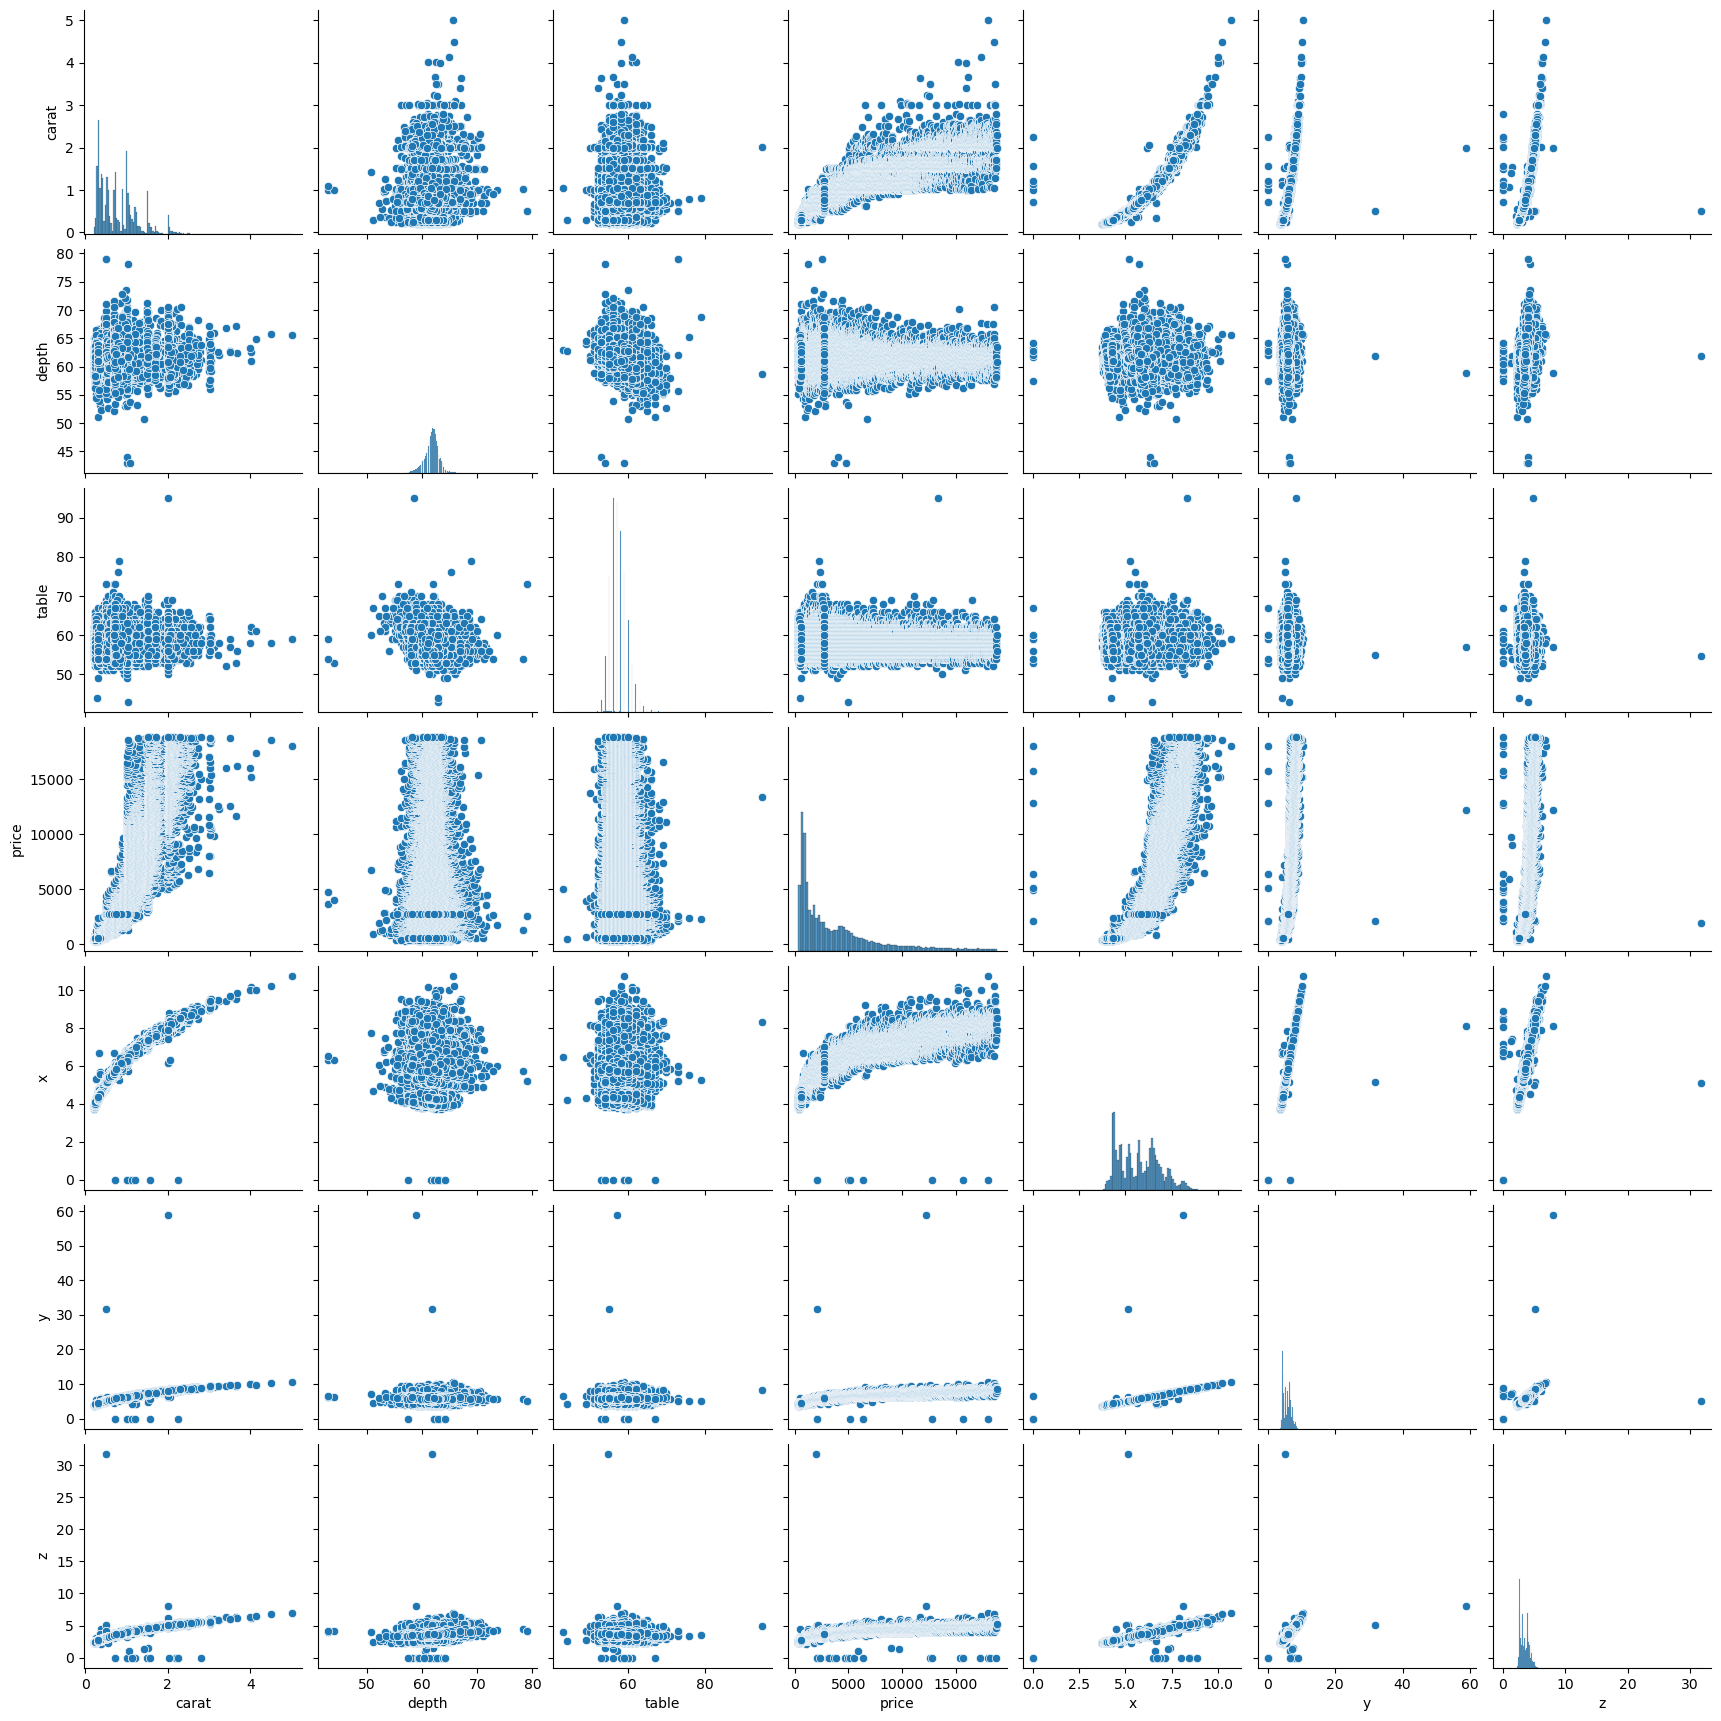

In [20]:
plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.show()

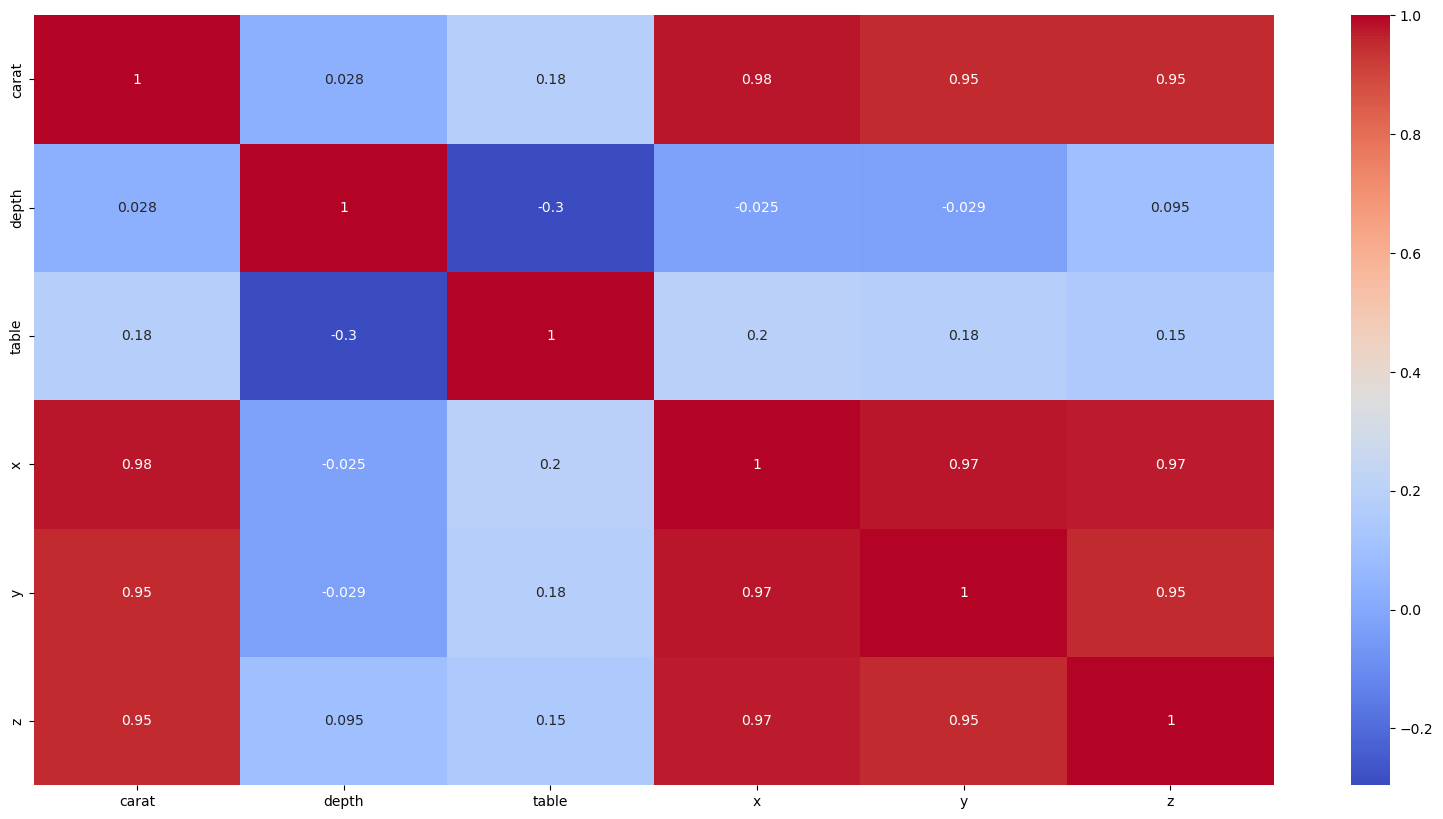

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include='float').corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

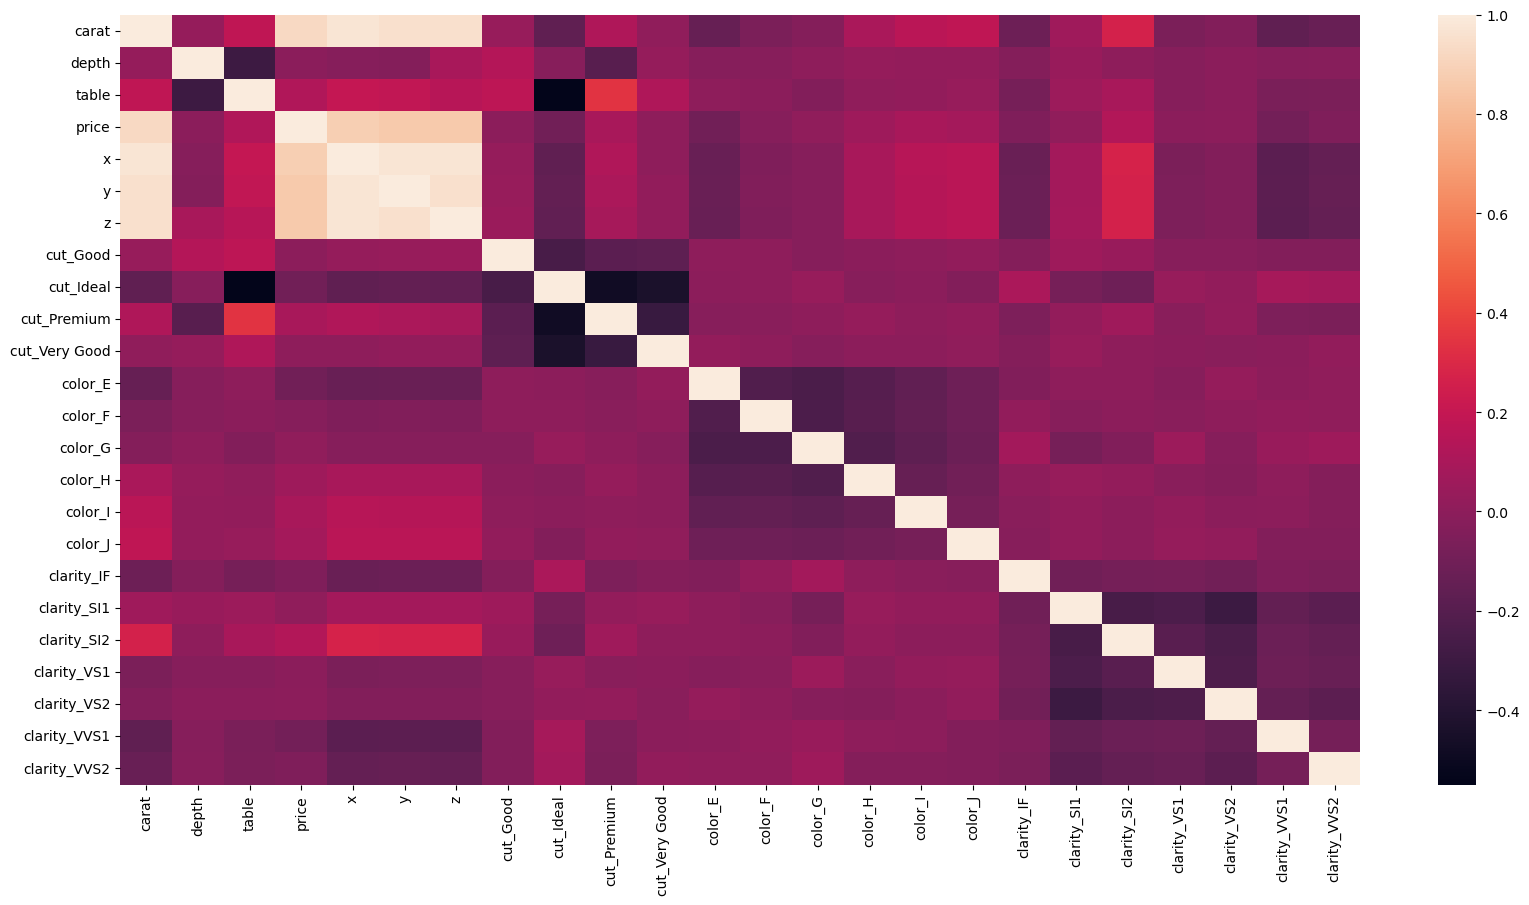

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.show()

<Figure size 2000x1000 with 0 Axes>

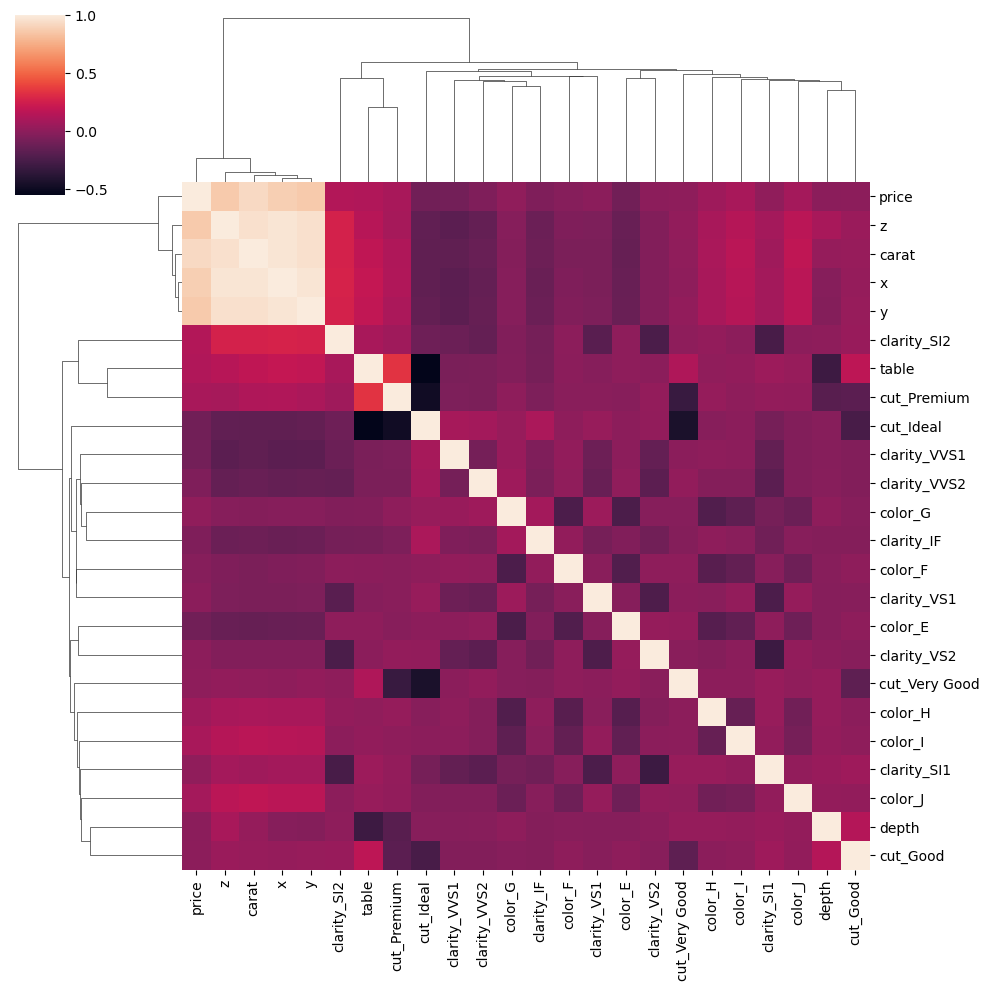

In [26]:
plt.figure(figsize=(20,10))
sns.clustermap(df.corr())
plt.show()

# TrainTest - Nettoyage - Encodage

In [27]:
from sklearn.model_selection import train_test_split